In [2]:
import pandas as pd
from datetime import datetime
from IPython.display import Image
from IPython.display import HTML
import matplotlib.pyplot as plt
import arcgis
import sys
from arcgis.gis import GIS
from arcgis.raster.functions import apply, clip, remap, colormap
from arcgis.geometry import lengths, areas_and_lengths, project
from arcgis.geometry import Point, Polyline, Polygon, Geometry
from arcgis.geocoding import geocode
from arcgis.features import FeatureLayer

In [3]:
import arcpy
from arcpy.ia import *


# Set input raster
in_raster = arcpy.Raster("D:\c\jaipur_2\L1C_T43REK_A028016_20220718T054109.tif")


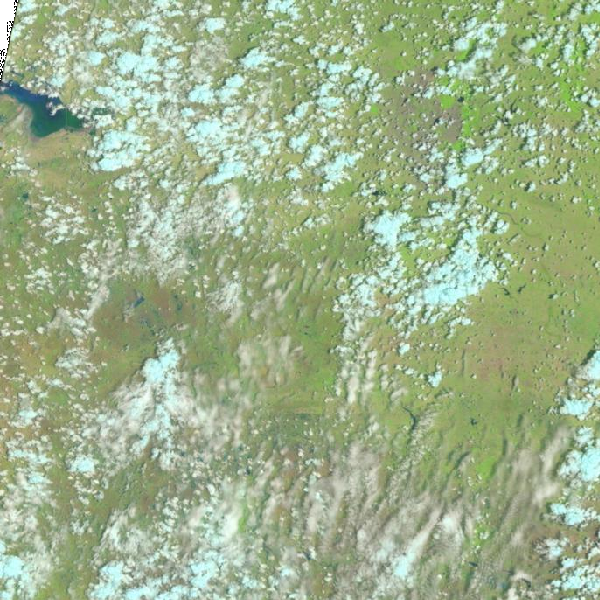

In [4]:
in_raster

In [14]:
from arcpy.sa import *

# Set the workspace environment
arcpy.env.workspace = "D:\c\jaipur_2"

# Set the input raster and output raster paths
input_raster = "L1C_T43REK_A028016_20220718T054109.tif.tif"
output_raster = "classified_land_cover.tif"

# Define the classification method
classification_method = "ISO"

# Set the parameters for the classification method
parameters = "MAXIMUM_LIKELIHOOD"
classes = 5
minMembers = 50
sampInterval = 15

# Perform the land cover classification
#classified_raster = IsoClusterUnsupervisedClassification(input_raster, classification_method, parameters)
classified_raster =IsoClusterUnsupervisedClassification(input_raster, classes, minMembers, sampInterval)

# Save the output raster
classified_raster.save(output_raster)

ExecuteError: Failed to execute. Parameters are not valid.
ERROR 000732: Input raster bands: Dataset D:\c\jaipur_2\L1C_T43REK_A028016_20220718T054109.tif does not exist or is not supported
Failed to execute (IsoClusterUnsupervisedClassification).


In [8]:
import arcpy
from arcpy.sa import *

# Set input TIFF file path
input_tiff = "D:\c\jaipur_2\L1C_T43REK_A028016_20220718T054109.tif"

# Set land, water, and green cover thresholds
land_threshold = 100
water_threshold = 80
green_threshold = 50

# Convert input TIFF file to raster
input_raster = arcpy.Raster(input_tiff)

# Create land, water, and green cover rasters using Con tool
land_raster = Con(input_raster > land_threshold, 1, 0)
water_raster = Con(input_raster < water_threshold, 1, 0)
green_raster = Con(input_raster > green_threshold, 1, 0)

# Calculate total number of pixels in input raster
total_pixels = input_raster.width * input_raster.height



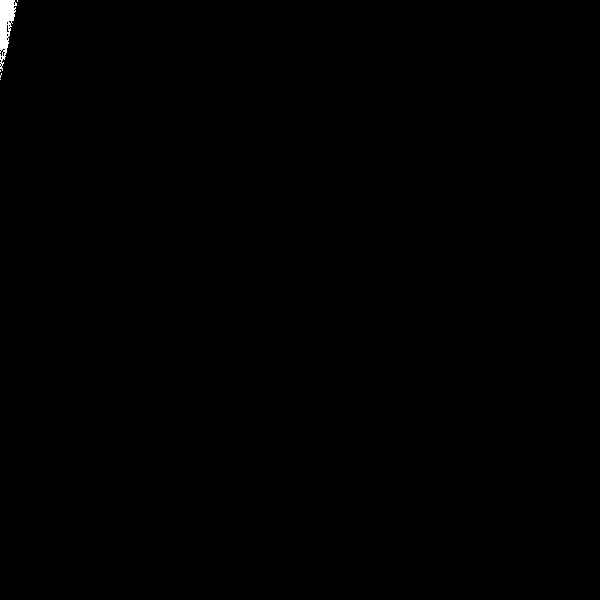

In [11]:
water_raster

In [13]:
# Calculate number of pixels in each land, water, and green cover raster
land_pixels = arcpy.GetRasterProperties_management(land_raster, "COLUMNCOUNT").getOutput(0)
water_pixels = arcpy.GetRasterProperties_management(water_raster, "COLUMNCOUNT").getOutput(0)
green_pixels = arcpy.GetRasterProperties_management(green_raster, "COLUMNCOUNT").getOutput(0)

# Calculate percentage of land, water, and green cover
land_percent = (float(land_pixels) / total_pixels) * 100
water_percent = (float(water_pixels) / total_pixels) * 100
green_percent = (float(green_pixels) / total_pixels) * 100

# Print results
print("Land cover: {:.2f}%".format(land_percent))
print("Water cover: {:.2f}%".format(water_percent))
print("Green cover: {:.2f}%".format(green_percent))

Land cover: 0.02%
Water cover: 0.02%
Green cover: 0.02%
